# Dataset

In [1]:
from keras.datasets import mnist
from matplotlib import pyplot as plt
import numpy as np

In [2]:
(X_train, _), (X_test, _) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
def show(batch):
    fig, axes = plt.subplots(2, 10, figsize = (16, 4))

    i = 60
    for r in range(2):
        for c in range(10):
            axes[r, c].imshow(batch[i], cmap = 'gray')
            i+=60

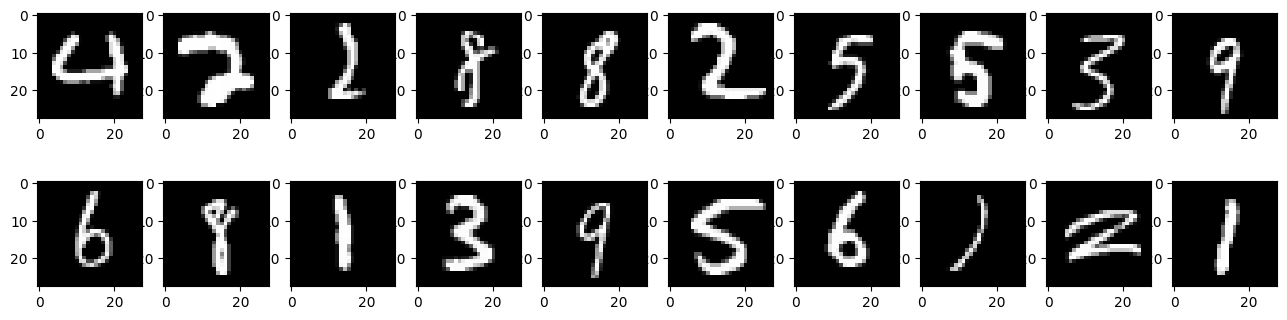

In [5]:
show(X_train)

In [6]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [7]:
noise_factor = 0.1

X_train_noise = X_train + noise_factor * np.random.randn(*X_train.shape)
X_test_noise = X_test + noise_factor * np.random.randn(*X_test.shape)

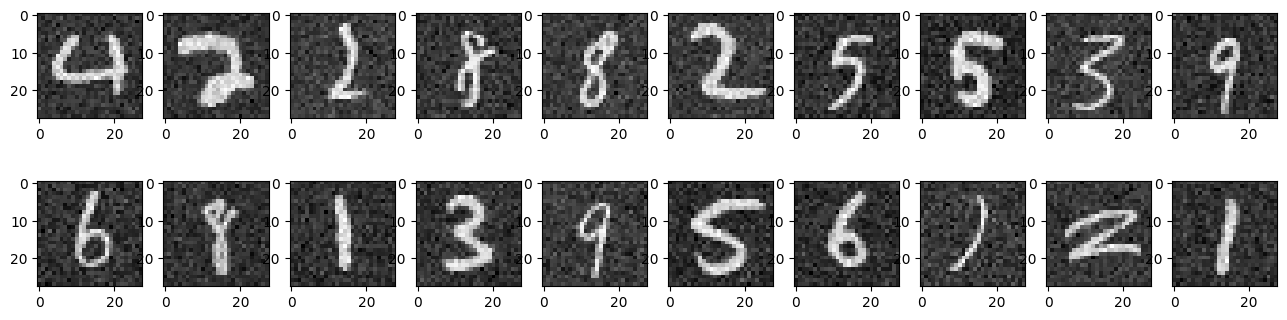

In [8]:
show(X_train_noise)

In [9]:
X_train = np.expand_dims(X_train, 3)
X_test = np.expand_dims(X_test, 3)

X_train_noise = np.expand_dims(X_train_noise, 3)
X_test_noise = np.expand_dims(X_test_noise, 3)

print(X_train.shape, X_test.shape)
X_train.shape == X_train_noise.shape and X_test.shape == X_test_noise.shape

(60000, 28, 28, 1) (10000, 28, 28, 1)


True

# Model

In [10]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPool2D, Dense, UpSampling2D, BatchNormalization
from keras.callbacks import ModelCheckpoint

In [11]:
encoder_input = Input(shape = X_train.shape[1:])

# encoder
x = Conv2D(32, 3, activation = 'relu', padding = 'same')(encoder_input)
x = BatchNormalization()(x)
x = MaxPool2D(padding = 'same')(x)

x = Conv2D(32, 3, activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
encoded = MaxPool2D(padding = 'same')(x)

In [12]:
# decoder
x = Conv2D(32, 3, activation = 'relu', padding = 'same')(encoded)
x = BatchNormalization()(x)
x = UpSampling2D()(x)

x = Conv2D(32, 3, activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = UpSampling2D()(x)
decoded = Conv2D(1, 3, activation = 'sigmoid', padding = 'same')(x)

In [13]:
autoencoder = Model(encoder_input, decoded)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 14, 14, 32)        128   

# Training

In [14]:
autoencoder.compile(loss = 'binary_crossentropy', optimizer = 'adam')
checkpoint = ModelCheckpoint("denoising_model.h5", save_best_only=True, verbose=1)

In [15]:
history = autoencoder.fit(X_train_noise, X_train, batch_size = 128, epochs = 33, callbacks = checkpoint, validation_split = 0.25, verbose = 2)

Epoch 1/33

Epoch 1: val_loss improved from inf to 0.11625, saving model to denoising_model.h5
352/352 - 11s - loss: 0.1560 - val_loss: 0.1162 - 11s/epoch - 30ms/step
Epoch 2/33


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 2: val_loss improved from 0.11625 to 0.07642, saving model to denoising_model.h5
352/352 - 3s - loss: 0.0758 - val_loss: 0.0764 - 3s/epoch - 9ms/step
Epoch 3/33

Epoch 3: val_loss improved from 0.07642 to 0.07291, saving model to denoising_model.h5
352/352 - 3s - loss: 0.0731 - val_loss: 0.0729 - 3s/epoch - 8ms/step
Epoch 4/33

Epoch 4: val_loss improved from 0.07291 to 0.07199, saving model to denoising_model.h5
352/352 - 3s - loss: 0.0718 - val_loss: 0.0720 - 3s/epoch - 9ms/step
Epoch 5/33

Epoch 5: val_loss improved from 0.07199 to 0.07134, saving model to denoising_model.h5
352/352 - 2s - loss: 0.0710 - val_loss: 0.0713 - 2s/epoch - 7ms/step
Epoch 6/33

Epoch 6: val_loss improved from 0.07134 to 0.07045, saving model to denoising_model.h5
352/352 - 3s - loss: 0.0704 - val_loss: 0.0704 - 3s/epoch - 7ms/step
Epoch 7/33

Epoch 7: val_loss improved from 0.07045 to 0.07026, saving model to denoising_model.h5
352/352 - 3s - loss: 0.0699 - val_loss: 0.0703 - 3s/epoch - 8ms/step
Epo

# Predictions

In [16]:
from keras.models import load_model

In [17]:
autoencoder = load_model('denoising_model.h5')
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 14, 14, 32)        128   

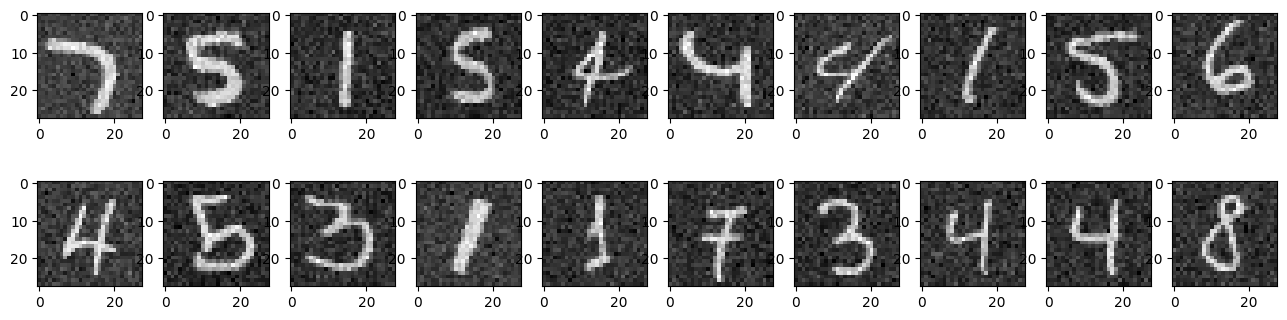

In [18]:
show(np.squeeze(X_test_noise))

In [19]:
preds = autoencoder.predict(X_test_noise)
preds.shape

313/313 [==============================] - 1s 3ms/step


(10000, 28, 28, 1)

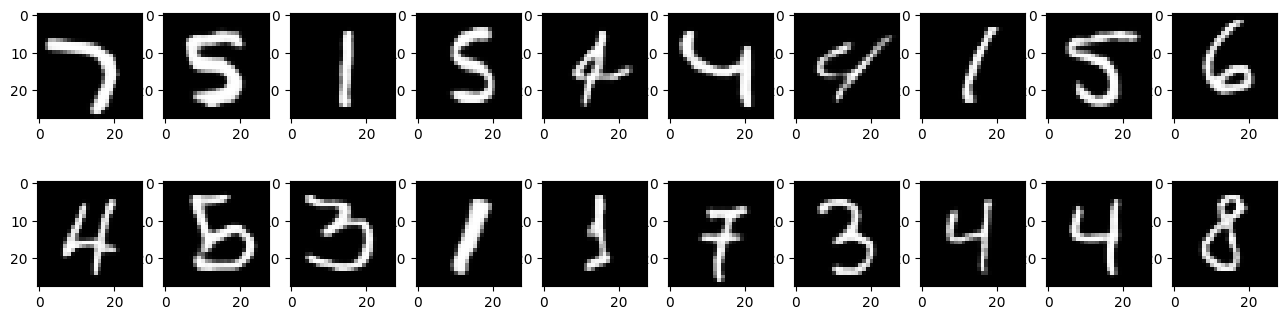

In [20]:
show(np.squeeze(preds))